In [16]:
import gala

In [1]:
from astroquery.gaia import Gaia

In [2]:
tables = Gaia.load_tables(only_names = True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [3]:
for table in tables:
    print(table.name)

external.apassdr9
external.catwise2020
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neighbour
gaiadr1.tmass_neighbourhood
gaiadr1.ucac4_best_neighbour
gaiadr1.ucac4_neighbourhood
gaiadr1.urat1_best_neighbour
gaiadr1.urat1_neighbourhood
gaiadr1.cepheid
gaiadr1.phot_variable_time_series_gfov
gaiadr1.phot_varia

In [4]:
table_metadata = Gaia.load_table('gaiadr2.gaia_source')
table_metadata

Retrieving table 'gaiadr2.gaia_source'


In [5]:
print(table_metadata)

TAP Table name: gaiadr2.gaiadr2.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 96


In [6]:
for column in table_metadata.columns:
    print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_mean_ma

In [7]:
ps_metadata = Gaia.load_table('gaiadr2.panstarrs1_original_valid')
print(ps_metadata)
for column in ps_metadata.columns:
    print(column.name)

Retrieving table 'gaiadr2.panstarrs1_original_valid'
TAP Table name: gaiadr2.gaiadr2.panstarrs1_original_valid
Description: The Panoramic Survey Telescope and Rapid Response System (Pan-STARRS) is
a system for wide-field astronomical imaging developed and operated by
the Institute for Astronomy at the University of Hawaii. Pan-STARRS1
(PS1) is the first part of Pan-STARRS to be completed and is the basis
for Data Release 1 (DR1). The PS1 survey used a 1.8 meter telescope and
its 1.4 Gigapixel camera to image the sky in five broadband filters (g,
r, i, z, y).

The current table contains a filtered subsample of the 10 723 304 629
entries listed in the original ObjectThin table.
We used only ObjectThin and MeanObject tables to extract
panstarrs1OriginalValid table, this means that objects detected only in
stack images are not included here. The main reason for us to avoid the
use of objects detected in stack images is that their astrometry is not
as good as the mean objects astrometry: “T

In [8]:
query1 = """


SELECT TOP 10 source_id, ra, dec, parallax 
FROM gaiadr2.gaia_source

"""
print(query1)




SELECT TOP 10 source_id, ra, dec, parallax 
FROM gaiadr2.gaia_source




In [9]:
  #  query1 = """
 #   --------docstring----------
  #  select and from - normal SQL database commands
  #  SELECT source_id, ra, dec, parallax 
  #  FROM gaiadr2.gaia_source
  #  WHERE *has default find sources as ALL sources*
  #  """
   # print(query1)

In [10]:
job1 = Gaia.launch_job(query1)
print(job1)

<Table length=10>
   name    dtype  unit                            description                            
--------- ------- ---- ------------------------------------------------------------------
source_id   int64      Unique source identifier (unique within a particular Data Release)
       ra float64  deg                                                    Right ascension
      dec float64  deg                                                        Declination
 parallax float64  mas                                                           Parallax
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1704569305924O-result.vot.gz
Results: None


In [11]:
results1 = job1.get_results()
type(results1)

astropy.table.table.Table

In [12]:
results1

source_id,ra,dec,parallax
,deg,deg,mas
int64,float64,float64,float64
3437755354875768960,90.24293902515944,30.1302743652005,1.9329812738770134
3437747898812232448,90.08563600398297,30.005455193871356,0.39544226497008966
3437845175527318144,91.85235521307521,30.76832560055109,-0.15647447740076337
3437838544099366912,91.74472590833689,30.675901846269817,0.7224215932706269
3437783186264278784,90.44115205419459,30.37845508562844,-0.05425998372166974
3437734812050901888,90.52424067303042,29.952769775821462,0.2595257049705949
3437801332500555392,91.41202750010648,30.209566718117532,1.8195443480334992
3437782091050760832,90.48796789120173,30.335952342370437,0.37433776206101554


In [13]:
query2 = """
SELECT TOP 3000
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
"""
print(query2)


SELECT TOP 3000
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1



In [14]:
job2 = Gaia.launch_job_async(query2)
job2

INFO: Query finished. [astroquery.utils.tap.core]


In [15]:
results2 = job2.get_results()
results2

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
3437747898812232448,90.08563600398297,30.005455193871356,0.5665176419404319,-4.263895746850702,0.39544226497008966
3437845175527318144,91.85235521307521,30.76832560055109,1.6587992045815332,-2.6161995424050084,-0.15647447740076337
3437838544099366912,91.74472590833689,30.675901846269817,0.42566199551212575,-2.7597003944679557,0.7224215932706269
3437783186264278784,90.44115205419459,30.37845508562844,2.642445115258642,-2.987297013342175,-0.05425998372166974
3437734812050901888,90.52424067303042,29.952769775821462,0.2881557048655275,-1.4510976898438257,0.2595257049705949
3437782091050760832,90.48796789120173,30.335952342370437,1.2515398168083745,-2.8937502443951275,0.37433776206101554
3437805593110134784,91.58578725172408,30.340209423555283,-2.0806597205937916,-0.12112163216780608,-1.5825925834307477
3437779441052691968,90.63077074307823,30.29713914890372,2.3102134796580387,-3.7333027226897038,-0.0436342969900038


In [16]:
columns = 'source_id, ra, dec, pmra, pmdec, parallax'

In [17]:
query3_base = '''
SELECT TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1 AND
    bp_rp BETWEEN -0.075 AND 2
'''

In [18]:
print(query3_base)


SELECT TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1 AND
    bp_rp BETWEEN -0.075 AND 2



In [19]:
query3 = query3_base.format(columns = columns)
print(query3)


SELECT TOP 10
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1 AND
    bp_rp BETWEEN -0.075 AND 2



In [20]:
job3 = Gaia.launch_job(query3)
job3

In [21]:
results3 = job3.get_results()
results3

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
5408466296526906240,151.63879214072907,-46.356565094495515,-7.44308922167848,2.4393057412162897,0.5464284228421046
5408458977902453632,151.43385129121137,-46.56950093005181,0.3131038626159425,2.687527984731533,0.6098915295533776
5408454751662024320,151.54695927697776,-46.648623128785566,-9.406013788824698,2.6991410133286475,0.5156864133844802
5408462207725157632,151.45939890609972,-46.408863133475855,-5.797859191086548,5.275151657479517,0.26415321409373765
5408423548720249216,151.19173123478419,-47.00020030139118,-5.419488527685878,2.317056475279479,0.7257249573651109
5408457908457389952,151.53367794986033,-46.52095888006821,-4.015352379119548,1.7893836859101353,0.09879730178122892
5408465570679869312,151.73949685949586,-46.36500736315685,-8.32866845643273,-3.0607435260314113,-1.8017220647348875
5408450972090858752,151.77152160614315,-46.552045278859424,-5.625144321570987,2.7104064177971328,0.32237945930071216


In [22]:
columns = 'source_id, ra, dec, pmra, pmdec, parallax'

In [23]:
new_query = '''
SELECT TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < {max_parallax} AND
    bp_rp BETWEEN -0.075 AND 2
'''
print(new_query)


SELECT TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < {max_parallax} AND
    bp_rp BETWEEN -0.075 AND 2



In [24]:
new_query = new_query.format(columns = columns, max_parallax = -1)
print(new_query)


SELECT TOP 10
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < -1 AND
    bp_rp BETWEEN -0.075 AND 2



In [25]:
new_job = Gaia.launch_job(new_query)
new_job

In [26]:
new_result = new_job.get_results()
new_result

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
4065007295292484736,272.6811251441056,-25.214718026263956,1074.6497559788959,-742.0939614123556,-1481.1277390779912
4089995896030234624,277.4770901932109,-22.31726676663418,176.1480909369099,-75.61008771917551,-1303.750056478928
4103265386511561472,278.9009174758996,-14.982766941889116,159.99236216549224,-126.24011322377166,-1212.0058184144166
4064704104946409728,273.98353695244646,-25.76445838488533,863.3175137554066,-573.9298427088005,-1170.364711079211
4089352058964259328,275.37301547875927,-24.038663497862775,1650.89562174097,1364.132389819495,-1142.5850548715614
234052082432242176,63.56813620224543,46.75409674381817,-486.70944038383385,349.8101062387467,-1051.0301233846474
6727658835736018304,273.4136374328988,-38.37560146276111,-61.85888768582436,-65.88596410631257,-1041.7257363594458
4050001298041477248,271.4620314612914,-30.075784978779907,-1698.1091021435025,-1425.8873638443915,-932.803119019893


In [27]:
# end of session one

In [28]:
import astropy.units as u

In [29]:
angle = 10*u.degree
type(angle)

astropy.units.quantity.Quantity

In [30]:
angle

<Quantity 10. deg>

In [31]:
angle.to(u.arcmin)

<Quantity 600. arcmin>

In [32]:
(angle + 5*u.arcmin).to(u.arcmin)

<Quantity 605. arcmin>

In [34]:
#Exercise
radius = 5*u.arcmin
radius.to(u.deg)

<Quantity 0.08333333 deg>

In [35]:
cone_query = """
SELECT
TOP 10
source_id, ra, dec
FROM gaiadr2.gaia_source
WHERE 1 = CONTAINS(
POINT(ra, dec),
CIRCLE(88.8, 7.4, 0.08333333))
"""

In [36]:
cone_job = Gaia.launch_job(cone_query)
cone_job

cone_results = cone_job.get_results()
cone_results

source_id,ra,dec
,deg,deg
int64,float64,float64
3322773965056065536,88.78178020183375,7.334936530583141
3322773758899157120,88.83227057144585,7.325577341429926
3322774068134271104,88.8206092188033,7.353158142762173
3322773930696320512,88.80843339290348,7.334853162299928
3322774377374425728,88.86806108182265,7.371287731275939
3322773724537891456,88.81308602813434,7.32488574492059
3322773724537891328,88.81570329208743,7.3223019772324855
3322773930696321792,88.8050736770331,7.332371472206583


In [38]:
cone_query = '''
SELECT
TOP 10
source_id, ra, dec
FROM gaiadr2.gaia_source
WHERE 1 = CONTAINS(
POINT(ra, dec),
CIRCLE(88.8, 7.4, 0.08333333))=1
'''

In [47]:
count_query = """
SELECT
count(source_id)
FROM gaiadr2.gaia_source
WHERE 1 = CONTAINS(
POINT(ra, dec),
CIRCLE(88.8, 7.4, 0.08333333))
"""

In [48]:
count_job = Gaia.launch_job(count_query)
count_results = count_job.get_results()
count_results

COUNT
int64
594


In [49]:
count_job = Gaia.launch_job(count_query)
print(count_job)
count_results = count_job.get_results()
print(count_results)
count_results

<Table length=1>
 name dtype
----- -----
COUNT int64
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1704569464345O-result.vot.gz
Results: None
COUNT
-----
  594


COUNT
int64
594


In [44]:
def run_query(query):
    count_job = Gaia.launch_job(query)
    count_results = count_job.get_results()
    return count_results

In [155]:
from astropy.coordinates import SkyCoord

In [51]:
# Betelguese
ra = 88.8 * u.degree
dec = 7.4 * u.degree
coord_icrs = SkyCoord(ra=ra, dec=dec, frame='icrs')

In [52]:
coord_icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (88.8, 7.4)>

In [53]:
coord_galactic = coord_icrs.transform_to('galactic')
coord_galactic

<SkyCoord (Galactic): (l, b) in deg
    (199.79693102, -8.95591653)>

In [54]:
from gala.coordinates import GD1Koposov10

In [57]:
gd1_frame = GD1Koposov10()
gd1_frame

<GD1Koposov10 Frame>

In [58]:
coord_gd1 = coord_icrs.transform_to(gd1_frame)
coord_gd1

<SkyCoord (GD1Koposov10): (phi1, phi2) in deg
    (-94.97222038, 34.5813813)>

In [60]:
phi1 = -94.97222038
phi2 = 34.5813813

In [66]:
# Exercise
origin_gd1 = SkyCoord(phi1 = 0*u.degree,
                      phi2 = 0*u.degree,
                      frame = gd1_frame
                     )

In [68]:
origin_gd1.transform_to('icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    (200., 59.4504341)>

In [69]:
phi1_min = -55*u.degree
phi1_max = -45*u.degree
phi2_min = -8*u.degree
phi2_max = 4*u.degree

In [70]:
def make_rectangle(x1, x2, y1, y2):
    '''
    return the corners of a rectangle
    '''
    xs = [x1, x1, x2, x2, x1]
    ys = [y1, y2, y2, y1, y1]
    return xs, ys

In [71]:
phi1_rect, phi2_rect = make_rectangle (phi1_min, phi1_max, phi2_min, phi2_max)

In [73]:
corners = SkyCoord(phi1 = phi1_rect,
                   phi2 = phi2_rect,
                   frame = gd1_frame
                  )
print(corners)

<SkyCoord (GD1Koposov10): (phi1, phi2) in deg
    [(-55., -8.), (-55.,  4.), (-45.,  4.), (-45., -8.), (-55., -8.)]>


In [74]:
corners_icrs = corners.transform_to('icrs')
corners_icrs

<SkyCoord (ICRS): (ra, dec) in deg
    [(146.27533314, 19.26190982), (135.42163944, 25.87738723),
     (141.60264825, 34.3048303 ), (152.81671045, 27.13611254),
     (146.27533314, 19.26190982)]>

In [75]:
corners_list_str = corners_icrs.to_string()
corners_list_str

['146.275 19.2619',
 '135.422 25.8774',
 '141.603 34.3048',
 '152.817 27.1361',
 '146.275 19.2619']

In [76]:
corners_single_str = ''.join(corners_list_str)
corners_single_str

'146.275 19.2619135.422 25.8774141.603 34.3048152.817 27.1361146.275 19.2619'

In [78]:
#add commas between spaces
corners_single_str.replace(' ', ', ')

'146.275, 19.2619135.422, 25.8774141.603, 34.3048152.817, 27.1361146.275, 19.2619'

In [101]:
def skycoord_to_string(skycoord):
    '''
convert a one-dimensional list of SkyCoord to string for Gaia's query format
    '''
    corners_list_str = skycoord.to_string()
    corners_single_str = ' '.join(corners_list_str)
    return corners_single_str.replace(' ' , ', ')

In [102]:
sky_point_list = skycoord_to_string(corners_icrs)
sky_point_list

'146.275, 19.2619, 135.422, 25.8774, 141.603, 34.3048, 152.817, 27.1361, 146.275, 19.2619'

In [109]:
columns = 'source_id, ra, dec, pmra, pmdec, parallax'

In [110]:
query3_base = '''
SELECT
Top 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
    AND bp_rp BETWEEN -0.75 AND 2
    '''

In [111]:
polygon_top10query_base = '''
SELECT
Top 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
    AND bp_rp BETWEEN -0.75 AND 2
    AND 1 = CONTAINS(
    POINT(ra, dec),
    POLYGON({sky_point_list})
    )
    '''

In [112]:
polygon_top10query = polygon_top10query_base.format(columns = columns, sky_point_list = sky_point_list)
print(polygon_top10query)


SELECT
Top 10
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
    AND bp_rp BETWEEN -0.75 AND 2
    AND 1 = CONTAINS(
    POINT(ra, dec),
    POLYGON(146.275, 19.2619, 135.422, 25.8774, 141.603, 34.3048, 152.817, 27.1361, 146.275, 19.2619)
    )
    


In [113]:
polygon_top10query_job = Gaia.launch_job_async(polygon_top10query)
polygon_top10query_job

INFO: Query finished. [astroquery.utils.tap.core]


In [114]:
polygon_top10query_results = polygon_top10query_job.get_results()
polygon_top10query_results

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
637987125186749568,142.48301935991023,21.75771616932985,-2.5168384683875766,2.941813096629439,-0.2573448962333354
638285195917112960,142.25452941346344,22.476168171141378,2.6627020143457996,-12.165984395577347,0.4227283465319491
638073505568978688,142.64528557468074,22.16693224953078,18.30674739454163,-7.950659620550862,0.10363972229362585
638086386175786752,142.57739430926034,22.22791951401365,0.9877856720147953,-2.584105480335548,-0.8573270355079308
638049655615392384,142.58913564478618,22.110783166677418,0.24443878227817095,-4.941079187010136,0.099624729200593
638267565075964032,141.81762228999614,22.375696125322275,-3.413174589660796,1.8838892877285924,-0.07271215219283075
638028902333511168,143.18339801317677,22.2512465812369,7.848511762712128,-21.391145547787154,0.28736226011479443
638085767700610432,142.9347319464589,22.46244080823965,-3.6585960944321476,-12.486419770278376,-0.9896728393047383


In [115]:
polygon_query_base = '''
SELECT
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
    AND bp_rp BETWEEN -0.75 AND 2
    AND 1 = CONTAINS(
    POINT(ra, dec),
    POLYGON({sky_point_list})
    )
    '''

In [116]:
polygon_query = polygon_query_base.format(columns = columns, sky_point_list = sky_point_list)
print(polygon_query)


SELECT
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
    AND bp_rp BETWEEN -0.75 AND 2
    AND 1 = CONTAINS(
    POINT(ra, dec),
    POLYGON(146.275, 19.2619, 135.422, 25.8774, 141.603, 34.3048, 152.817, 27.1361, 146.275, 19.2619)
    )
    


In [117]:
# all stars in rectangle
polygon_job = Gaia.launch_job_async(polygon_query)
print(polygon_job)

INFO: Query finished. [astroquery.utils.tap.core]
<Table length=140339>
   name    dtype    unit                              description                            
--------- ------- -------- ------------------------------------------------------------------
source_id   int64          Unique source identifier (unique within a particular Data Release)
       ra float64      deg                                                    Right ascension
      dec float64      deg                                                        Declination
     pmra float64 mas / yr                         Proper motion in right ascension direction
    pmdec float64 mas / yr                             Proper motion in declination direction
 parallax float64      mas                                                           Parallax
Jobid: 1704573051988O
Phase: COMPLETED
Owner: None
Output file: async_20240106143052.vot
Results: None


In [124]:
polygon_results = polygon_job.get_results()

In [121]:
filename = 'gd1_results.fits'
polygon_results.write(filename, overwrite = True)

In [122]:
from os.path import getsize
MB = 1024*1024
getsize(filename)/MB

6.4324951171875

In [ ]:
# from astropy.table import Table
# polygon_results_readin = Table.read(filename)

In [ ]:
# end of session 2

In [126]:
polygon_results.info

<Table length=140339>
   name    dtype    unit                              description                            
--------- ------- -------- ------------------------------------------------------------------
source_id   int64          Unique source identifier (unique within a particular Data Release)
       ra float64      deg                                                    Right ascension
      dec float64      deg                                                        Declination
     pmra float64 mas / yr                         Proper motion in right ascension direction
    pmdec float64 mas / yr                             Proper motion in declination direction
 parallax float64      mas                                                           Parallax

In [127]:
polygon_results.colnames

['source_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax']

In [128]:
type(polygon_results['ra'])

astropy.table.column.MaskedColumn

In [129]:
polygon_results.to_pandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140339 entries, 0 to 140338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   source_id  140339 non-null  int64  
 1   ra         140339 non-null  float64
 2   dec        140339 non-null  float64
 3   pmra       140339 non-null  float64
 4   pmdec      140339 non-null  float64
 5   parallax   140339 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 6.4 MB


In [130]:
type(polygon_results[0])

astropy.table.row.Row

In [131]:
polygon_results[0]['ra'] #same as polygon_results['ra'][0]

142.48301935991023

In [133]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'dec [degrees ICRS]')

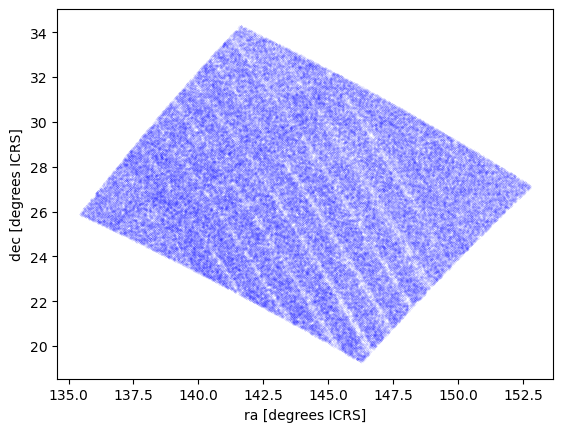

In [153]:
# %matplotlib notebook
x = polygon_results['ra']
y = polygon_results['dec']
plt.plot(x, y,'bo', markersize = .2, alpha = .2)
plt.xlabel('ra [degrees ICRS]')
plt.ylabel('dec [degrees ICRS]')

In [160]:
skycoord = SkyCoord(ra = polygon_results['ra'],
                   dec = polygon_results['dec'],
                    frame = 'icrs'
                  )

In [162]:
distance = 8 * u.kpc
radial_velocity = 0. * u.km / u.s

skycoord = SkyCoord(ra = polygon_results['ra'],
                    dec = polygon_results['dec'],
                    pm_ra_cosdec = polygon_results['pmra'],
                    pm_dec = polygon_results['pmdec'],
                    distance = distance,
                    radial_velocity = radial_velocity
                    )
                    

In [163]:
transformed = skycoord.transform_to(gd1_frame)

In [164]:
from gala.coordinates import reflex_correct
skycoord_gd1 = reflex_correct(transformed)

Text(0, 0.5, 'phi2 [degrees GD1]')

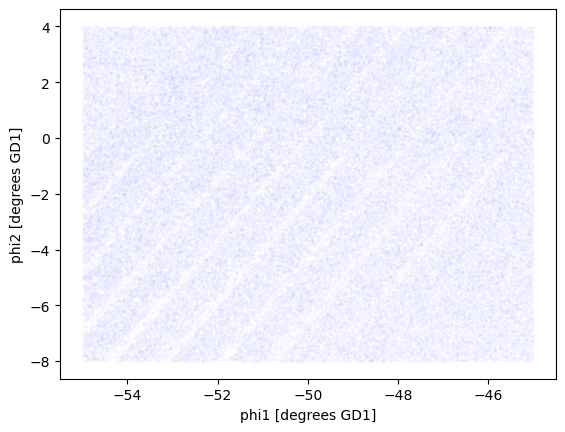

In [166]:
x = skycoord_gd1.phi1
y = skycoord_gd1.phi2
plt.plot(x,
         y,
         'bo',
         markersize = 0.1,
         alpha = 0.1,
        ) #alpha is transparency -> 0 is transparent, 1 is solid
plt.xlabel('phi1 [degrees GD1]')
plt.ylabel('phi2 [degrees GD1]')
           

In [167]:
type(polygon_results)

astropy.table.table.Table

In [168]:
type(skycoord_gd1)

astropy.coordinates.sky_coordinate.SkyCoord

In [172]:
polygon_results['phi1'] = skycoord_gd1.phi1
polygon_results['phi2'] = skycoord_gd1.phi2
polygon_results['phix'] = skycoord_gd1.phi2

In [173]:
polygon_results.info()

<Table length=140339>
   name    dtype    unit                              description                                class    
--------- ------- -------- ------------------------------------------------------------------ ------------
source_id   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn
       ra float64      deg                                                    Right ascension MaskedColumn
      dec float64      deg                                                        Declination MaskedColumn
     pmra float64 mas / yr                         Proper motion in right ascension direction MaskedColumn
    pmdec float64 mas / yr                             Proper motion in declination direction MaskedColumn
 parallax float64      mas                                                           Parallax MaskedColumn
     phi1 float64      deg                                                                          Column
     phi2 float

In [174]:
polygon_results.remove_column('phix')

In [178]:
polygon_results['pm_phi1'] = skycoord_gd1.pm_phi1_cosphi2
polygon_results['pm_phi2'] = skycoord_gd1.pm_phi2

In [179]:
polygon_results.info()

<Table length=140339>
   name    dtype    unit                              description                                class    
--------- ------- -------- ------------------------------------------------------------------ ------------
source_id   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn
       ra float64      deg                                                    Right ascension MaskedColumn
      dec float64      deg                                                        Declination MaskedColumn
     pmra float64 mas / yr                         Proper motion in right ascension direction MaskedColumn
    pmdec float64 mas / yr                             Proper motion in declination direction MaskedColumn
 parallax float64      mas                                                           Parallax MaskedColumn
     phi1 float64      deg                                                                          Column
     phi2 float

In [180]:
import pandas as pd

In [181]:
results_df = polygon_results.to_pandas()

In [187]:
results_df.shape

(140339, 10)

In [188]:
results_df.head()

,source_id,ra,dec,pmra,pmdec,parallax,phi1,phi2,pm_phi1,pm_phi2
0,637987125186749568,142.483019,21.757716,-2.516838,2.941813,-0.257345,-54.975623,-3.659349,6.429945,6.518157
1,638285195917112960,142.254529,22.476168,2.662702,-12.165984,0.422728,-54.498247,-3.081524,-3.168637,-6.206795
2,638073505568978688,142.645286,22.166932,18.306747,-7.950660,0.103640,-54.551634,-3.554229,9.129447,-16.819570
3,638086386175786752,142.577394,22.227920,0.987786,-2.584105,-0.857327,-54.536457,-3.467966,3.837120,0.526461
4,638049655615392384,142.589136,22.110783,0.244439,-4.941079,0.099625,-54.627448,-3.542738,1.466103,-0.185292


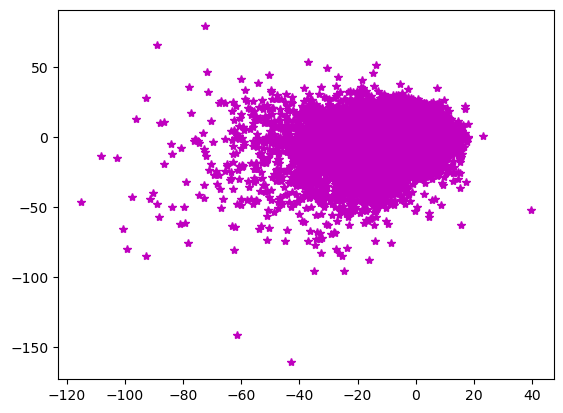

In [205]:
k = polygon_results['pm_phi1']
m = polygon_results['pm_phi2']
plt.plot(k,m, 'm*')

In [197]:
def make_dataframe(table):
    '''
    transform coordinates from ICRS to GD-1 frame
    
    table: astropy table
    returns: pandas dataframe
    '''
    #create a skycoord frame with coordinates and proper motions
    distance = 8 * u.kpc
    radial_velocity = 0. * u.km / u.s

    skycoord = SkyCoord(ra = table['ra'],
                        dec = table['dec'],
                        pm_ra_cosdec = table['pmra'],
                        pm_dec = table['pmdec'],
                        distance = distance,
                        radial_velocity = radial_velocity,
                        frame = 'icrs'
                        )
    #define the gd-1 frame
    gd1_frame = GD1Koposov10()

    #transform coordinates from icrs to gd-1
    transformed = skycoord.transform_to(gd1_frame)

    skycoord_gd1 = reflex_correct(transformed)

    #add gd-1 refrence frame data
    table['phi1'] = skycoord_gd1.phi1
    table['phi2'] = skycoord_gd1.phi2
    table['pm_phi1'] = skycoord_gd1.pm_phi1_cosphi2
    table['pm_phi2'] = skycoord_gd1.pm_phi2

    #create data frame
    df = table.to_pandas()
    
    return df

In [198]:
results_df = make_dataframe(polygon_results)

In [199]:
type(results_df)

pandas.core.frame.DataFrame

In [200]:
from astropy.table import Table
results_table = Table.from_pandas(results_df)
type(results_table)

astropy.table.table.Table

In [201]:
filename = 'gd1_data.hdf'
results_df.to_hdf(filename, 'results_df', mode = 'w')

In [202]:
results_df.describe()

,source_id,ra,dec,pmra,pmdec,parallax,phi1,phi2,pm_phi1,pm_phi2
count,1.403390e+05,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000
mean,6.792399e+17,143.823122,26.780285,-2.484404,-6.100777,0.179492,-50.091158,-1.803301,-0.868963,1.409208
std,3.792177e+16,3.697850,3.052592,5.913939,7.202047,0.759590,2.892344,3.444398,6.657714,6.518615
min,6.214900e+17,135.425699,19.286617,-106.755260,-138.065163,-15.287602,-54.999989,-8.029159,-115.275637,-161.150142
25%,6.443517e+17,140.967966,24.592490,-5.038789,-8.341561,-0.035981,-52.602952,-4.750426,-2.948723,-1.107128
50%,6.888060e+17,143.734409,26.746261,-1.834943,-4.689596,0.362708,-50.147362,-1.671502,0.585037,1.987149
75%,6.976579e+17,146.607350,28.990500,0.452893,-1.937809,0.657637,-47.593279,1.160514,3.001768,4.628965
max,7.974418e+17,152.777393,34.285481,104.319923,20.981070,0.999957,-44.999985,4.014609,39.802471,79.275199


(-10.0, 10.0)

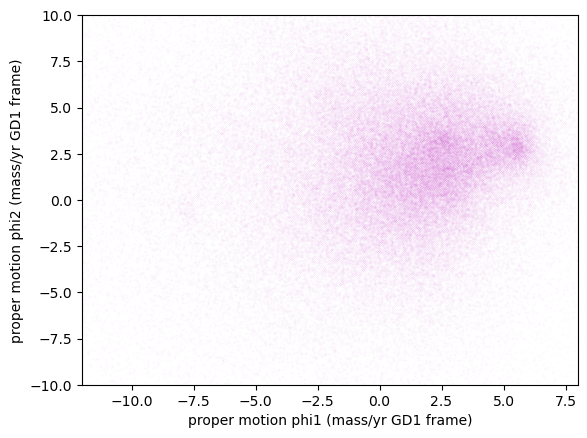

In [203]:
x = results_df['pm_phi1']
y = results_df['pm_phi2']
plt.plot(x, y, 'mo', markersize = 0.1, alpha = 0.1)

plt.xlabel ('proper motion phi1 (mass/yr GD1 frame)')
plt.ylabel ('proper motion phi2 (mass/yr GD1 frame)')

plt.xlim(-12, 8)
plt.ylim(-10, 10)

In [206]:
phi2 = results_df['phi2']
type(phi2)

pandas.core.series.Series

In [207]:
phi2_min = -1.0 * u.degree
phi2_max = 1.0 * u.degree

In [214]:
mask = (phi2 > phi2_min) & (phi2 < phi2_max)
mask.sum()

25084

In [216]:
centerline_df = results_df[mask]
type(centerline_df)

pandas.core.frame.DataFrame

In [217]:
len(centerline_df) / len(results_df)

0.1787386257562046

(-10.0, 10.0)

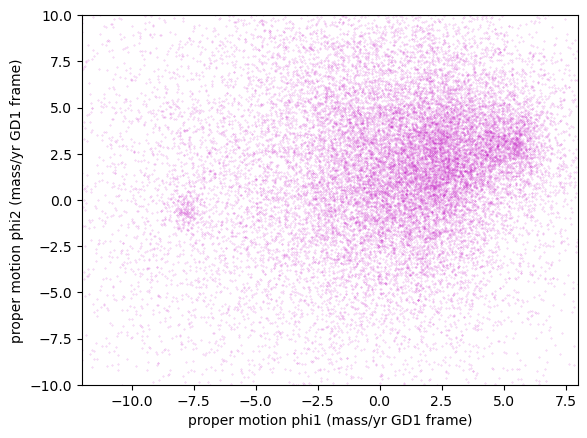

In [219]:
x = centerline_df['pm_phi1']
y = centerline_df['pm_phi2']
plt.plot(x, y, 'mo', markersize = 0.3, alpha = 0.3)

plt.xlabel ('proper motion phi1 (mass/yr GD1 frame)')
plt.ylabel ('proper motion phi2 (mass/yr GD1 frame)')

plt.xlim(-12, 8)
plt.ylim(-10, 10)

In [220]:
pm1_min = -8.9
pm1_max = -6.9
pm2_min = -2.2
pm2_max = 1.0

In [221]:
pm1_rect, pm2_rect = make_rectangle(pm1_min,
                                    pm1_max,
                                    pm2_min,
                                    pm2_max
                                   )

In [222]:
def plot_proper_motion(df):
    x = df['pm_phi1']
    y = df['pm_phi2']
    plt.plot(x, y, 'mo', markersize = 0.3, alpha = 0.3)
    
    plt.xlabel ('proper motion phi1 (mass/yr GD1 frame)')
    plt.ylabel ('proper motion phi2 (mass/yr GD1 frame)')
    
    plt.xlim(-12, 8)
    plt.ylim(-10, 10)

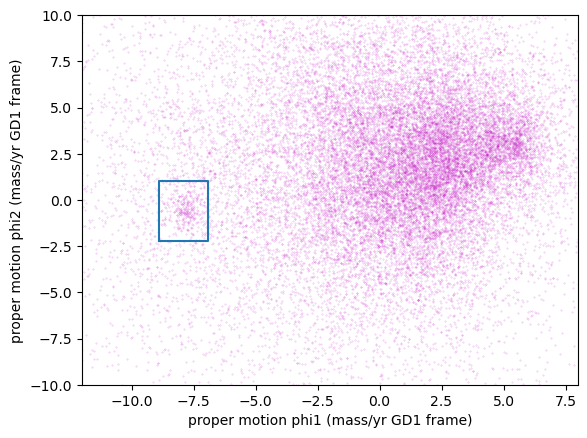

In [223]:
plot_proper_motion(centerline_df)
plt.plot(pm1_rect, pm2_rect)

In [224]:
def between(series, low, high):
    '''
    create a mask for series values between low and high
    '''
    return (series > low) & (series < high)

In [225]:
pm1 = results_df['pm_phi1']
pm2 = results_df['pm_phi2']

pm_mask = (between(pm1, pm1_min, pm1_max) &
           between(pm2, pm2_min, pm2_max)
          )

In [227]:
pm_mask.sum()

1049

In [228]:
selected_df = results_df[pm_mask]
len(selected_df)

1049

Text(0, 0.5, 'phi 2 (degree GD1)')

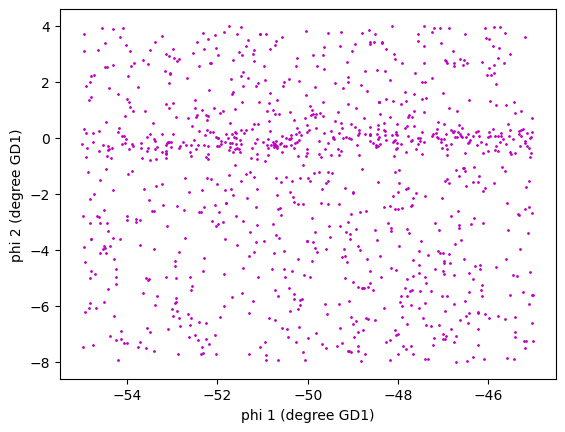

In [229]:
x = selected_df['phi1']
y = selected_df['phi2']
plt.plot(x, y, 'mo', markersize = 1, alpha = 1)

plt.xlabel('phi 1 (degree GD1)')
plt.ylabel('phi 2 (degree GD1)')

(-55.4928032130903, -44.503699550734694, -8.606246809552195, 4.601299340488263)

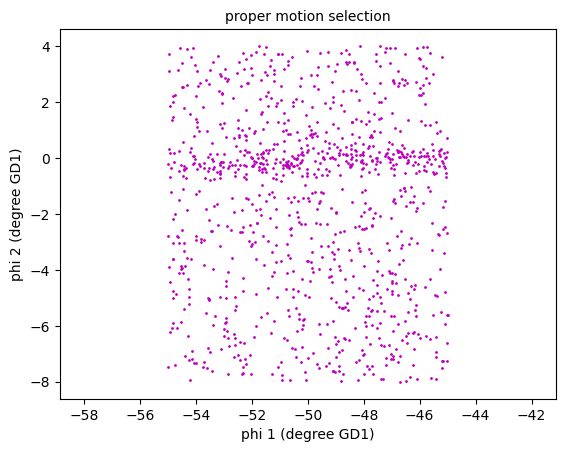

In [230]:
x = selected_df['phi1']
y = selected_df['phi2']
plt.plot(x, y, 'mo', markersize = 1, alpha = 1)

plt.xlabel('phi 1 (degree GD1)')
plt.ylabel('phi 2 (degree GD1)')

plt.title('proper motion selection', fontsize = 'medium')
plt.axis('equal')

In [240]:
def plot_pm_selection(df):
    '''
    plot in gd-1 spatial coordinates the
    location of the stars selected by
    proper motion
    '''
    x = selected_df['phi1']
    y = selected_df['phi2']
    
    plt.xlabel('phi 1 (degree GD1)')
    plt.ylabel('phi 2 (degree GD1)')
    plt.plot(x, y, 'mo', markersize = 1, alpha = 1)
    
    plt.title('proper motion selection', fontsize = 'medium')
    plt.axis('equal')

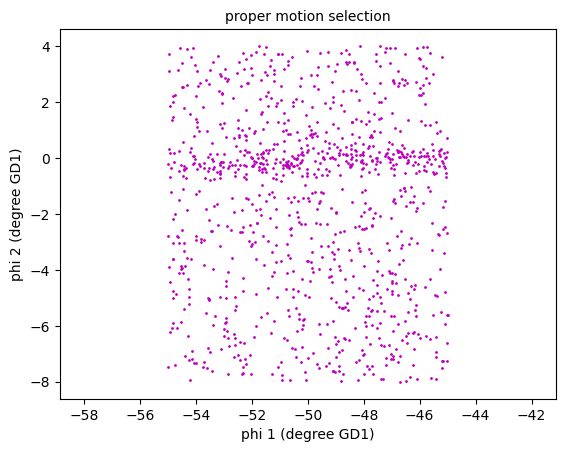

In [242]:
plot_pm_selection(selected_df)

In [247]:
filename = 'gd1_data.hdf'

selected_df.to_hdf(filename, 'selected_df')

In [248]:
with pd.HDFStore(filename) as hdf:
    print(hdf.keys())

['/results_df', '/selected_df']


In [249]:
filename

'gd1_data.hdf'

In [250]:
centerline_df.to_hdf(filename, 'centerline_df')

In [251]:
with pd.HDFStore(filename) as hdf:
    print(hdf.keys())

['/centerline_df', '/results_df', '/selected_df']
